<a href="https://colab.research.google.com/github/hrytsiukp/DSC/blob/master/NelinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МОДЕЛЬ  ЛІНІЙНОЇ РЕГРЕСІЇ

Спочатку будується модель лінійної регресії на всіх факторах. Але частина з них є незначущими і знижують якість моделі. Їх потрібно видалити з даних.

Для оцінки значущості факторів можна використати модель лінійної регресії га всіх факторах та переглянути статистичну значущість кожного коефіцієнта. Також можна використовувати методи відбору факторів, такі як регуляризація (наприклад, Lasso або Ridge регресія), або методи відбору на основі важливості, такі як випадковий ліс чи градієнтний бустінг.

Одним із найбільш поширених способів оцінки значущості факторів є використання моделі лінійної регресії та перегляд стандартних помилок коефіцієнтів (стандартних помилок оцінок). Чим менше стандартна помилка, тим більш значущий вважається коефіцієнт. Для реалізації цього методу використовують бібліотеку statsmodels: import statsmodels.api as sm

Для отримання інформації про якість отриманої моделі використовують команду
print(model.summary())

Ця команда надасть детальну інформацію про кожен фактор, включаючи його стандартну помилку та p-value. Фактори з найменшими p-value вважаються найбільш значущими. Ці відомості можна використати для вибору найбільш значущих факторів моделі. Відбір факторів слід продовжувати до тих пір, поки не залишиться 2 - 3 найбільш значущих фактори.

# ПРОГНОЗУВАННЯ НА ОСНОВІ МОДЕЛІ ЛІНІЙНОЇ РЕГРЕСІЇ
Модель лінійної регресії можна використовувати для прогнозування.

Для оцінки точності прогнозування використовують різні оцінки.

**RMSE (Root Mean Squared Error)** - це метрика, яка використовується для вимірювання рівня точності моделі регресії шляхом порівняння реальних значень відгуку з передбаченими моделлю значеннями. Метрика RMSE визначається як сума квадратів відхилень передбачених значень від фактичних. Іншими словами
RMSE вимірює середньоквадратичну відстань між реальними та передбаченими значеннями. Чим менше RMSE, тим краще модель.

**Метрика MAE (Mean Absolute Error)** визначає середнє абсолютне значення різниці між реальними та передбаченими значеннями. MAE дозволяє оцінити середню абсолютну величину помилок моделі.

**Метрика MAPE (Mean Absolute Percentage Error).** Це середня абсолютна відсоткова похибка між реальними та передбаченими значеннями. MAPE дозволяє оцінити середню абсолютну відсоткову помилку моделі.

In [1]:
# Імпорт бібліотек та модулів
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
# Завантаження даних з диска
from google.colab import files

uploaded = files.upload() # Зчитування файлу з диска. Після зчитування цей рядок задокументувати
file = "stepglobal.csv" # для степу
# file = "lisoglobal.csv" # для лісостепу
# file = "westglobal.csv" # для заходу

XY = pd.read_csv(file)
XY.info() # інформація про дані
# print()
print(XY.head)

Saving stepglobal.csv to stepglobal.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t1      132 non-null    float64
 1   t2      132 non-null    float64
 2   t3      132 non-null    float64
 3   t4      132 non-null    float64
 4   t5      132 non-null    float64
 5   t6      132 non-null    float64
 6   t7      132 non-null    float64
 7   t8      132 non-null    float64
 8   t9      132 non-null    float64
 9   R10     132 non-null    float64
 10  R20     132 non-null    float64
 11  R30     132 non-null    float64
 12  t11     132 non-null    float64
 13  t22     132 non-null    float64
 14  t33     132 non-null    float64
 15  t44     132 non-null    float64
 16  t55     132 non-null    float64
 17  t66     132 non-null    float64
 18  t77     132 non-null    float64
 19  t88     132 non-null    float64
 20  t99     132 non-null    float64
 21 

In [ ]:
# статистичне описання даних
#  загальний формат - 2 знаки після коми
pd.options.display.float_format = '{:,.2f}'.format
print(XY.describe())

In [3]:
# Розділення змінних на впливаючі фактори та змінну -відгук
import statsmodels.api as sm
# Визначення факторів (всі колонки, крім колонки з змінною-відгуком eps)
X = XY.drop(columns=['eps'])
# Додати константу до матриці X
X0 = sm.add_constant(X)
# X0 = X
# Визначення залежної змінної
y = XY['eps']
# print(X0.head()) # перегляд факторів

In [4]:
# Побудова загальної моделі з усіма факторами
model = sm.OLS(y, X0).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    eps   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     9.214
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           3.52e-18
Time:                        18:29:30   Log-Likelihood:                -352.57
No. Observations:                 132   AIC:                             775.1
Df Residuals:                      97   BIC:                             876.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.4259     56.067      0.757      0.4

Високе значення Cond. No. вказує на низьку якість моделі.

Для підвищення якості моделі потрібно видалити незначущі фактори

In [5]:
# Побудова моделі : відбір факторів 1
X1 = X0.drop(columns=['t2','t3','t4','t5','t8','t9','t22','R12','R23']) # step global
# X1 = X0.drop(columns=['t2','t3','t4','t6','t9','R10','R30','t22','t12','t78','R100','R12','R200','R300']) # lisostep global
# X1 = X0.drop(columns=['t1','t5','t7','t8','t9','R20','R30','t33','t44','t55','t66','t77','t99','R100','R200','R300','t23','t34']) # west
model1 = sm.OLS(y, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    eps   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     13.48
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           9.61e-23
Time:                        18:29:39   Log-Likelihood:                -353.35
No. Observations:                 132   AIC:                             758.7
Df Residuals:                     106   BIC:                             833.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.9213     26.993      1.775      0.0

In [6]:
# Побудова моделі : відбір факторів 1
X2 = X1.drop(columns=['R20','R30','R100','R200','R300','t45']) # stepglobal
# X2 = X1.drop(columns=['t5','t55','t23','t45','t56','R20','R23']) # Лісостеп нелінійна модель

model1 = sm.OLS(y, X2).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    eps   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     18.07
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           9.00e-26
Time:                        18:29:47   Log-Likelihood:                -355.20
No. Observations:                 132   AIC:                             750.4
Df Residuals:                     112   BIC:                             808.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5018     23.632      2.645      0.0

In [7]:
# Побудова моделі : відбір факторів 1
X3 = X2.drop(columns=['t12','t23','t78','t89','t99']) # stepglobal  ,'t89','t99'

model1 = sm.OLS(y, X3).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    eps   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     23.06
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           2.92e-27
Time:                        18:29:53   Log-Likelihood:                -360.36
No. Observations:                 132   AIC:                             750.7
Df Residuals:                     117   BIC:                             794.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3059     22.532      2.765      0.0

Якщо у моделі присутні фактори із значущістю P > |t| яка перевищує 0.05, потрібно видалити ці фактори

In [8]:
XY2 = X3
XY2['eps'] = XY['eps']

# print(XY2.head())

In [10]:
# Метод крос валідації з повторним вибором
# Задання розміру навчальної вибірки - 75% від всіх даних
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

samplesize = int(0.75 * XY2.shape[0])

# Значення випадкового фактора
random_seeds = [32, 42, 52, 62, 72, 82, 92, 102, 112, 122]

# Зберігаємо значення R^2 та RMSE для кожного випадкового фактора
r2_scores = []
rmse_scores = []
coef = []

for seed in random_seeds:
    # Фіксуємо генератор випадкових чисел для повторюваності
    np.random.seed(seed)

# Розбивка даних на навчальну та тестову вибірки
    index = np.random.choice(XY2.index, size=samplesize, replace=True)
    train = XY2.loc[index]
    test = XY2.drop(index)

# Розділення змінних у впливаючі фактори та змінну відгук
    x_train = train.iloc[:, :-1]  # впливаючі фактори
    y_train = train.iloc[:, -1]   # змінна відгук
    x_test = test.iloc[:, :-1]  # впливаючі фактори тестової вибірки
    y_test = test.iloc[:, -1]   # змінна відгук тестової вибірки

# Побудова та оцінка моделі множинної лінійної регресії
    model = sm.OLS(y_train, x_train).fit()

    # Оцінка моделі
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # Обчислення значень R^2 та RMSE
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)

    # Зберігаємо значення
    r2_scores.append(test_r2)
    rmse_scores.append(test_rmse)
    coef.append(model.params)

# Усереднюємо значення R^2 та RMSE
avg_r2 = np.mean(r2_scores)
avg_rmse = np.mean(rmse_scores)
# Усереднення коефіцієнтів
avg_coef = pd.DataFrame(coef).mean()
# avg_coef = avg_coef.rename({0: 'b1', 1: 'b2', 2: 'b3', 3: 'b4', 4: 'b5', 5: 'b6', 6: 'b7', 7: 'b8', 8: 'b9', 9: 'b10', 10: 'b20', 11: 'b30', 12: 'b11', 13: 'b22', 14: 'b33', 15: 'b44', 16: 'b55', 17: 'b66', 18: 'b77', 19: 'b88', 20: 'b99', 21: 'b100', 22: 'b200', 23: 'b300', 24: 'b12', 25: 'b23', 26: 'b34', 27: 'b45', 28: 'b56', 29: 'b67', 30: 'b78', 31: 'b89', 32: 'b100', 33: 'b200', 34: 'b300', 35: 'b120', 36: 'b230'}, axis='index')

# Виводимо результати на консоль
print("Average R^2: {:.2f}".format( avg_r2))
print("Average RMSE: {:.2f}".format(avg_rmse))
print("Average Coefficients:")
print(avg_coef)


Average R^2: 0.62
Average RMSE: 4.34
Average Coefficients:
const    67.210256
t1        3.860722
t6        3.921584
t7      -11.316980
R10       0.090553
t11      -0.208485
t33      -0.312410
t44      -0.241389
t55      -0.396428
t66      -0.141025
t77       0.501198
t88      -0.018039
t34       0.583125
t56       0.653768
t67      -0.470494
dtype: float64


In [11]:
# Усереднене прогнозування
# Розбивка даних на навчальну та тестову вибірки (нова тестова вибірка - 25%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XY2.iloc[:, :-1], XY2.iloc[:, -1], test_size=0.25, random_state=42)

# Побудова та оцінка моделі множинної лінійної регресії на навчальній вибірці
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Оцінка моделі
train_pred = model.predict(sm.add_constant(X_train))
test_pred = model.predict(sm.add_constant(X_test))

# Обчислення R^2 та RMSE на тестовій вибірці
test_r2 = r2_score(y_test, test_pred)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)

# Виведення результатів оцінки на тестовій вибірці
print("Test R^2: {:.2f}".format(test_r2))
print("Test RMSE: {:.2f}".format(test_rmse))

# Прогнозування на новій тестовій вибірці за допомогою усереднених коефіцієнтів
new_test_pred = model.predict(sm.add_constant(X_test))

# Виведення фактичних значень та прогнозів
print("Фактичні значення eps:")
print([f"{value:.2f}" for value in y_test.values])
print("Прогнозовані значення eps:")
print([f"{value:.2f}" for value in new_test_pred.values])


Test R^2: 0.55
Test RMSE: 4.47
Фактичні значення eps:
['-10.20', '-5.26', '-0.00', '0.76', '-3.74', '-9.89', '2.83', '-5.24', '-16.09', '5.79', '-3.67', '4.53', '-18.38', '7.24', '0.47', '-0.07', '0.23', '-0.84', '-5.94', '4.48', '-1.74', '-2.94', '-1.67', '6.80', '-8.16', '6.07', '1.18', '-10.99', '5.14', '-0.72', '-12.96', '0.41', '8.42']
Прогнозовані значення eps:
['-6.89', '-1.51', '0.06', '1.37', '-8.42', '-8.16', '1.60', '-7.97', '0.35', '7.11', '0.32', '1.49', '-9.61', '6.06', '-1.94', '-2.14', '2.69', '-0.52', '-1.96', '0.06', '-2.26', '-2.60', '-0.53', '1.07', '0.35', '5.10', '-0.27', '-5.98', '2.80', '-3.07', '-8.06', '-0.71', '7.50']


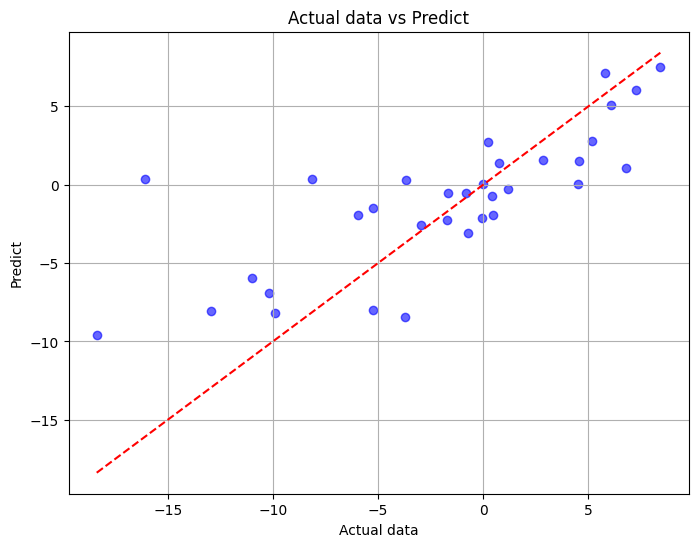

In [12]:
import matplotlib.pyplot as plt

# Побудова точкового графіку
# Побудова точкового графіку
plt.figure(figsize=(8, 6))
plt.scatter(y_test, new_test_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls='--', color='red')  # Діагональ першого та третього квадрантів
plt.title('Actual data vs Predict')
plt.xlabel('Actual data')
plt.ylabel('Predict')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Побудова точкового графіку
# Побудова точкового графіку
plt.figure(figsize=(8, 6))
plt.scatter(y_test, new_test_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls='--', color='red')  # Діагональ першого та третього квадрантів
plt.title('Actual data vs Predict')
plt.xlabel('Actual data')
plt.ylabel('Predict')
plt.grid(True)
plt.show()

In [ ]:
# Введення нових даних для прогнозування
# new_data = np.array(generate_params(t1, t2, t3, t4, t5, t6, t7, t8, t9, R10, R20, R30))
# uploaded = files.upload() # Зчитування файлу з диска. Після зчитування цей рядок задокументувати
file = "new.csv"

XYnew = pd.read_csv(file)
XYnew.info() # інформація про дані
print()
print(XYnew.head)

# Визначення значень t1, t2, ..., R30 з даних
t1 = XYnew['t1'].tolist()
t2 = XYnew['t2'].tolist()
t3 = XYnew['t3'].tolist()
t4 = XYnew['t4'].tolist()
t5 = XYnew['t5'].tolist()
t6 = XYnew['t6'].tolist()
t7 = XYnew['t7'].tolist()
t8 = XYnew['t8'].tolist()
t9 = XYnew['t9'].tolist()
R10 = XYnew['R10'].tolist()
R20 = XYnew['R20'].tolist()
R30 = XYnew['R30'].tolist()

# Генерування параметрів моделі
params = generate_params(t1[0], t2[0], t3[0], t4[0], t5[0], t6[0], t7[0], t8[0], t9[0], R10[0], R20[0], R30[0])
print(params)

In [ ]:
# Функція для генерації параметрів за заданими формулами
def generate_params(t1, t2, t3, t4, t5, t6, t7, t8, t9, R10, R20, R30):
    t11 = t1 * t1
    t22 = t2 * t2
    t33 = t3 * t3
    t44 = t4 * t4
    t55 = t5 * t5
    t66 = t6 * t6
    t77 = t7 * t7
    t88 = t8 * t8
    t99 = t9 * t9

    R100 = R10 * R10
    R200 = R20 * R20
    R300 = R30 * R30

    t12 = t1 * t2
    t23 = t2 * t3
    t34 = t3 * t4
    t45 = t4 * t5
    t56 = t5 * t6
    t67 = t6 * t7
    t78 = t7 * t8
    t89 = t8 * t9

    R12 = R10 * R20
    R23 = R20 * R30

    return [t1, t2, t3, t4, t5, t6, t7, t8, t9, R10, R20, R30,
            t11, t22, t33, t44, t55, t66, t77, t88, t99, R100, R200, R300,
            t12, t23, t34, t45, t56, t67, t78, t89, R12, R23]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t1      1 non-null      float64
 1   t2      1 non-null      float64
 2   t3      1 non-null      float64
 3   t4      1 non-null      float64
 4   t5      1 non-null      float64
 5   t6      1 non-null      float64
 6   t7      1 non-null      float64
 7   t8      1 non-null      float64
 8   t9      1 non-null      float64
 9   R10     1 non-null      int64  
 10  R20     1 non-null      int64  
 11  R30     1 non-null      int64  
dtypes: float64(9), int64(3)
memory usage: 224.0 bytes

<bound method NDFrame.head of     t1    t2    t3     t4     t5     t6    t7    t8    t9  R10  R20  R30
0  9.7  13.1  14.8  15.34  17.74  19.49  21.0  19.5  18.1   40   60   50>
[9.7, 13.1, 14.8, 15.34, 17.74, 19.49, 21.0, 19.5, 18.1, 40, 60, 50, 94.08999999999999, 171.60999999999999, 219.04000000000002, 235.3156, 314.707599

In [ ]:
# Функція для прогнозування
# def forecast(t1, t2, t3, t4, t5, t6, t7, t8, t9, R10, R20, R30,t11, t22, t33, t44, t55, t66, t77, t88, t99,
#             R100, R200, R300,  t12, t23, t34, t45, t56, t67, t78, t89, R12, R23):

#    y = const + t1, t2, t3, t4, t5, t6, t7, t8, t9, R10, R20, R30,t11, t22, t33, t44, t55, t66, t77, t88, t99,
#             R100, R200, R300,  t12, t23, t34, t45, t56, t67, t78, t89, R12, R23
# Значення факторів регресії
t_values = np.array([t1, t2, t3, t4, t5, t6, t7, t8, t9, t11, t22, t33, t44, t55, t66, t77, t88, t99, R100, R200, R300, t12, t23, t34, t45, t56, t67, t78, t89, R12, R23])

# Перетворення вектора коефіцієнтів у numpy array
coef_values = avg_coef.values

# Скалярне множення
regression_result = np.dot(coef_values, t_values)

print("Результат регресії:", regression_result)

In [ ]:
# Вхідні дані для прогнозування
new_data = np.array(generate_params(t1[0], t2[0], t3[0], t4[0], t5[0], t6[0], t7[0], t8[0], t9[0], R10[0], R20[0], R30[0]))

# Визначення впливаючих факторів та змінної відгуку для прогнозування
exog = new_data[-3:]  # Впливаючі фактори
const = np.ones(len(exog))  # Константа
exog = np.column_stack((const, exog))  # Додаємо константу до впливаючих факторів

# Прогнозування
prediction = model.predict(exog)

print("Predicted values:", prediction)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Побудова моделі лінійної регресії
model = LinearRegression()
model.fit(x_train, y_train)

# Прогнозування за навчальною вибіркою
train_pred = model.predict(x_train)

# Прогнозування за тестовою вибіркою
test_pred = model.predict(x_test)


In [ ]:
# Побудова графіка відповідності для навчальної вибірки
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_pred, color='blue', label='Прогноз (навчальна вибірка)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогноз на навчальній вибірці')
plt.legend()
plt.show()


In [ ]:
# Графік 2 навчальних даних та їх прогнозів
plt.plot(np.arange(len(x_train)), train.iloc[:, -1], label='Actual')
plt.plot(np.arange(len(x_train)), train_pred, label='Predicted', linestyle='--')
plt.legend()
plt.show()

In [ ]:
# Побудова графіку для тестової вибірки
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, color='green', label='Прогноз (тестова вибірка)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогноз на тестовій вибірці')
plt.legend()
plt.show()

In [ ]:
# Графік 2 тестових даних та їх прогнозів
plt.plot(np.arange(len(x_test)), test.iloc[:, -1], label='Actual')
plt.plot(np.arange(len(x_test)), test_pred, label='Predicted', linestyle='--')
plt.legend()
plt.show()



In [ ]:
# Виведення кореляційної матриці (якщо потрібно)
train0 = train.drop(columns=['const'])
print(train0.corr().round(2))

In [ ]:
# Обчислюємо матрицю кореляції
correlation_matrix = XY.corr()
# Виводимо матрицю кореляції
print(correlation_matrix.round(2))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Перевірка мультиколінеарності факторів
# Обчислюємо значення VIF для кожного фактора
# Зазвичай значення VIF більше 10 вказує на мультиколінеарність
vif = pd.DataFrame()
# vif["Фактор"] = factors.columns
vif["Фактор"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif.round(2))